# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [83]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [84]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [85]:
# df_raw.count()
len(df_raw.index)

400

Answer: 400

#### Question 2. Create a summary table

In [86]:
#function
np.round(df_raw.describe(), 3)
# i think this is what you're looking for...not sure what the "function" in the starter code is for...doesn't seem like we need to define a function here...

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000,398.000,398.000,399.000
mean,0.318,588.040,3.391,2.486
std,0.466,115.629,0.381,0.945
min,0.000,220.000,2.260,1.000
25%,0.000,NaN,NaN,NaN
50%,0.000,NaN,NaN,NaN
75%,1.000,NaN,NaN,NaN
max,1.000,800.000,4.000,4.000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because it has a much higher possible range, i.e. it's on a wider scale

#### Question 4. Drop data points with missing data


In [87]:
df = df_raw.dropna()
np.round(df.describe(), 3)

,admit,gre,gpa,prestige
count,397.000,397.000,397.000,397.000
mean,0.317,587.859,3.392,2.489
std,0.466,115.718,0.380,0.947
min,0.000,220.000,2.260,1.000
25%,0.000,520.000,3.130,2.000
50%,0.000,580.000,3.400,2.000
75%,1.000,660.000,3.670,3.000
max,1.000,800.000,4.000,4.000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Therea are no more NaNs, and the count is now at 397.

#### Question 6. Create box plots for GRE and GPA

OrderedDict([('gre', <matplotlib.axes._subplots.AxesSubplot at 0x16cf5898>)])

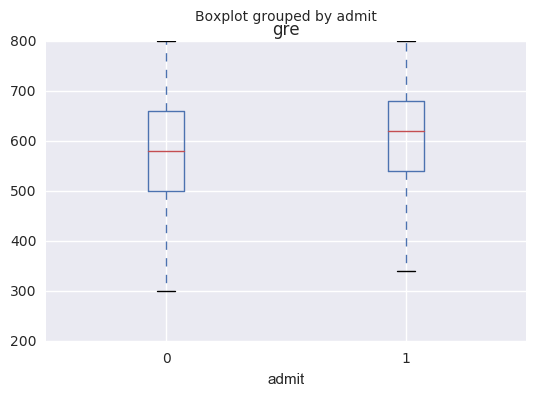

In [88]:
#boxplot 1
df.boxplot(column='gre',by='admit',return_type='axes')

OrderedDict([('gpa', <matplotlib.axes._subplots.AxesSubplot at 0x16d07b00>)])

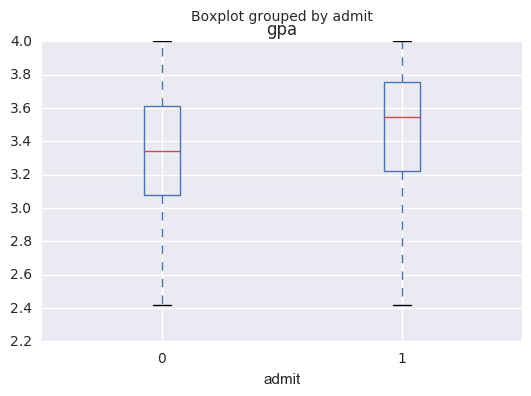

In [89]:
#boxplot 2 
df.boxplot(column='gpa',by='admit',return_type='axes')

#### Question 7. What do this plots show?

Answer: For the most part, people need at least a decent gpa or gpa to get admitted, but low scores on either doesn't necessarily preclude an applicant from getting accepted.

#### Question 8. Describe each distribution 

(array([  61.,  148.,  121.,   67.]),
 array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ]),
 <a list of 4 Patch objects>)

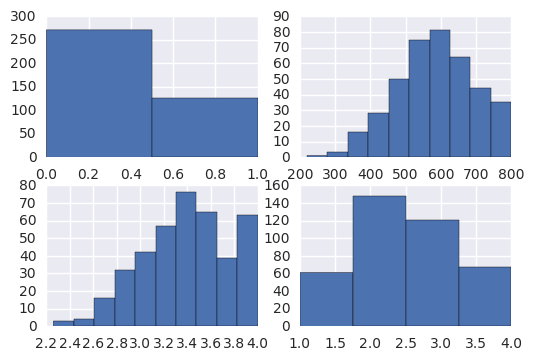

In [107]:
# plot the distribution of each variable 
fig1 = plt.figure()
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)
ax1.hist(df.admit, 2)
ax2.hist(df.gre, 10)
ax3.hist(df.gpa)
ax4.hist(df.prestige, 4)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [103]:
import seaborn as sns

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


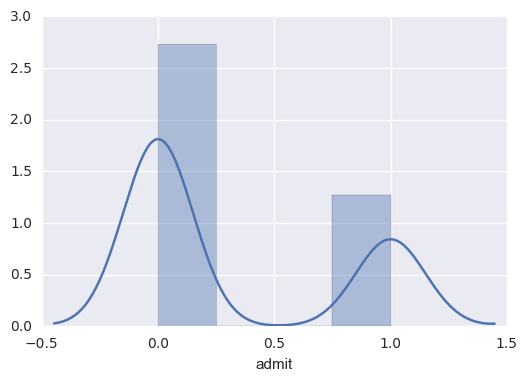

In [109]:
#fig2 = plt.figure()
#ax5 = fig2.add_subplot(221)
#ax6 = fig2.add_subplot(222)
#ax7 = fig2.add_subplot(223)
#ax8 = fig2.add_subplot(224)
sns.distplot(df.admit)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


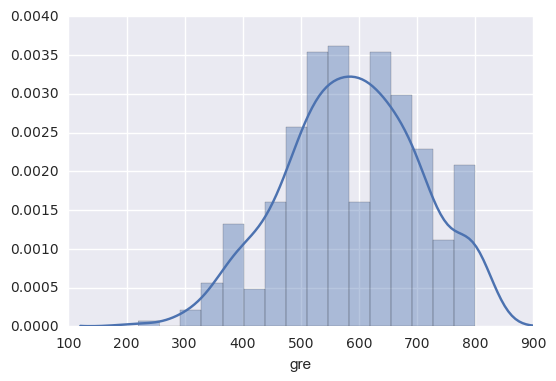

In [110]:
sns.distplot(df.gre)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


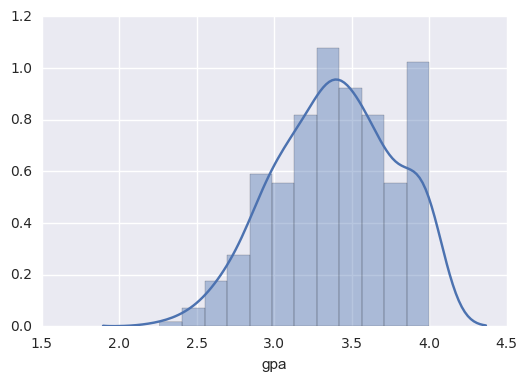

In [111]:
sns.distplot(df.gpa)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


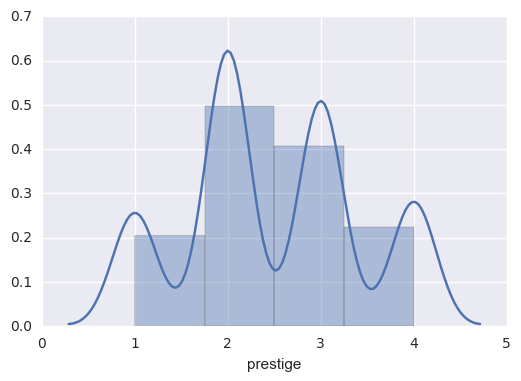

In [113]:
sns.distplot(df.prestige, 4)

Sort of close call, but I'd say no.  gpa and gre tend to be slightly left skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [115]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: prestige isn't a useful factor.  gre and gpa are useful, but neither are very strong.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The next step would be to start running linear regressions against the data (gre against admit, and gpa angainst admit).  Starting with single linear regression and then multiple linear regression.  We can check the r-squared and p-values.  We can also transform the data if necessary.

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that gpa and gre have no bearing on admissions

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data